# Visualizing the shifts that I've worked at Staples
This comes from my Google Sheets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from datetime import date

## Setup the file

In [2]:
csvName = 'Staples Finances 2025.csv'
csvName = 'Staples Finances 2023-24.csv'

currentYear = '2025'

if csvName == 'Staples Finances 2023-24.csv': 
    currentYear = '2024'

## Cleanup file 

In [3]:
df = pd.read_csv(csvName)

# print(df.head(100))


# Remove columns that are over 30% NaN
numRows = len(df)
for col in df.columns: 
    numNaN = df[col].isna().sum()
    percentEmpty = numNaN / numRows

    if percentEmpty > 0.30 and col != 'YEAR SELECTOR': 
        print(f"{percentEmpty:.3f}")
        print(f"Dropping the col {col}")
        df.drop(col, axis=1, inplace=True)

# Rename 'DATE ' to 'DATE'
if 'DATE ' in df.columns:
    df.rename(columns={'DATE ': 'DATE'}, inplace=True)

print(df)

0.944
Dropping the col Unnamed: 0
0.894
Dropping the col Unnamed: 2
0.995
Dropping the col Unnamed: 6
1.000
Dropping the col skip lunch
0.732
Dropping the col PAYCHCK
0.737
Dropping the col Assumed tax
1.000
Dropping the col Unnamed: 13
0.803
Dropping the col bfr tax est total:
1.000
Dropping the col $19,348.53
1.000
Dropping the col paychck tot:
1.000
Dropping the col $16,651.51
1.000
Dropping the col Difference:
1.000
Dropping the col $2,697.02
1.000
Dropping the col 14%
    YEAR SELECTOR        DATE        IN      OUT  time  hours (minus lunch)  \
0             NaN         NaN       NaN      NaN   NaN                  NaN   
1            16.9         NaN       NaN      NaN   NaN                  NaN   
2           25.35  Sat Aug 17   2:00 PM  7:41 PM  5:41                 5.68   
3               0  Thu Aug 15  12:03 PM  8:39 PM  8:36                 8.10   
4             NaN  Tue Aug 13  12:36 PM  8:44 PM  8:08                 7.63   
..            ...         ...       ...      ...

## Convert to correct time format

Notice that you will get an error if you do not RELOAD the data before running this cell.

In [4]:
df['IN'] = pd.to_datetime(df['IN'], format='%I:%M %p').dt.time
df['OUT'] = pd.to_datetime(df['OUT'], format='%I:%M %p').dt.time
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time

print(df)

    YEAR SELECTOR        DATE        IN       OUT      time  \
0             NaN         NaN       NaT       NaT       NaT   
1            16.9         NaN       NaT       NaT       NaT   
2           25.35  Sat Aug 17  14:00:00  19:41:00  05:41:00   
3               0  Thu Aug 15  12:03:00  20:39:00  08:36:00   
4             NaN  Tue Aug 13  12:36:00  20:44:00  08:08:00   
..            ...         ...       ...       ...       ...   
193           NaN  Mon Jul 24  16:18:00  20:50:00  04:32:00   
194           NaN  Sun Jul 23  09:54:00  18:35:00  08:41:00   
195           NaN  Sat Jul 22  11:52:00  16:13:00  04:21:00   
196           NaN  Thu Jul 20  12:15:00  15:59:00  03:44:00   
197           NaN  Wed Jul 19  12:11:00  16:02:00  03:51:00   

     hours (minus lunch)     EARN  
0                    NaN      NaN  
1                    NaN      NaN  
2                   5.68   $96.05  
3                   8.10  $137.74  
4                   7.63  $129.00  
..                   ...   

## Label 2023 and 2024 data

In [5]:
lastRowOf2024 = len(df)
firstRowOf2024 = len(df)

if currentYear == '2024':
    for idx, cell in df['YEAR SELECTOR'].items():

        # Find the last row of 2024
        if cell == '2024  ⬆️':
            lastRowOf2024 = idx
            print(lastRowOf2024)

elif currentYear == '2025':
    for idx, cell in df['YEAR SELECTOR'].items():

        # Find the first row of 2024
        if cell == '2024 ⬇️':
            firstRowOf2024 = idx
            print(firstRowOf2024)
    

107


## Convert to correct date format

Notice that you will get an error if you do not RELOAD the data before running this cell.

In [6]:
if currentYear == '2024':
    df['DATE'].iloc[0:lastRowOf2024] = pd.to_datetime(df['DATE'].iloc[0:lastRowOf2024] + ' ' + currentYear, format='%a %b %d %Y', errors='coerce').dt.date
    df['DATE'].iloc[lastRowOf2024:len(df)] = pd.to_datetime(df['DATE'].iloc[lastRowOf2024:len(df)] + ' 2023', format='%a %b %d %Y', errors='coerce').dt.date
elif currentYear == '2025': 
    df['DATE'].iloc[0:firstRowOf2024] = pd.to_datetime(df['DATE'].iloc[0:firstRowOf2024] + ' ' + currentYear, format='%a %b %d %Y', errors='coerce').dt.date
    df['DATE'].iloc[firstRowOf2024:len(df)] = pd.to_datetime(df['DATE'].iloc[firstRowOf2024:len(df)] + ' 2024', format='%a %b %d %Y', errors='coerce').dt.date

df['DATE'] = df['DATE'] 
print(df)

    YEAR SELECTOR        DATE        IN       OUT      time  \
0             NaN         NaT       NaT       NaT       NaT   
1            16.9         NaT       NaT       NaT       NaT   
2           25.35  2024-08-17  14:00:00  19:41:00  05:41:00   
3               0  2024-08-15  12:03:00  20:39:00  08:36:00   
4             NaN  2024-08-13  12:36:00  20:44:00  08:08:00   
..            ...         ...       ...       ...       ...   
193           NaN  2023-07-24  16:18:00  20:50:00  04:32:00   
194           NaN  2023-07-23  09:54:00  18:35:00  08:41:00   
195           NaN  2023-07-22  11:52:00  16:13:00  04:21:00   
196           NaN  2023-07-20  12:15:00  15:59:00  03:44:00   
197           NaN  2023-07-19  12:11:00  16:02:00  03:51:00   

     hours (minus lunch)     EARN  
0                    NaN      NaN  
1                    NaN      NaN  
2                   5.68   $96.05  
3                   8.10  $137.74  
4                   7.63  $129.00  
..                   ...   

/var/folders/3b/9d3900dj0b53yzgc017pbr480000gq/T/ipykernel_10052/3395763199.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['DATE'].iloc[0:lastRowOf2024] = pd.to_datetime(df['DATE'].iloc[0:lastRowOf2024] + ' ' + currentYear, format='%

## Remove shifts during winter break (2025)

In [7]:
if currentYear == '2025':
    df = df[df['DATE'] >= date(2025, 5, 1)]
    print(df)

## PLOT

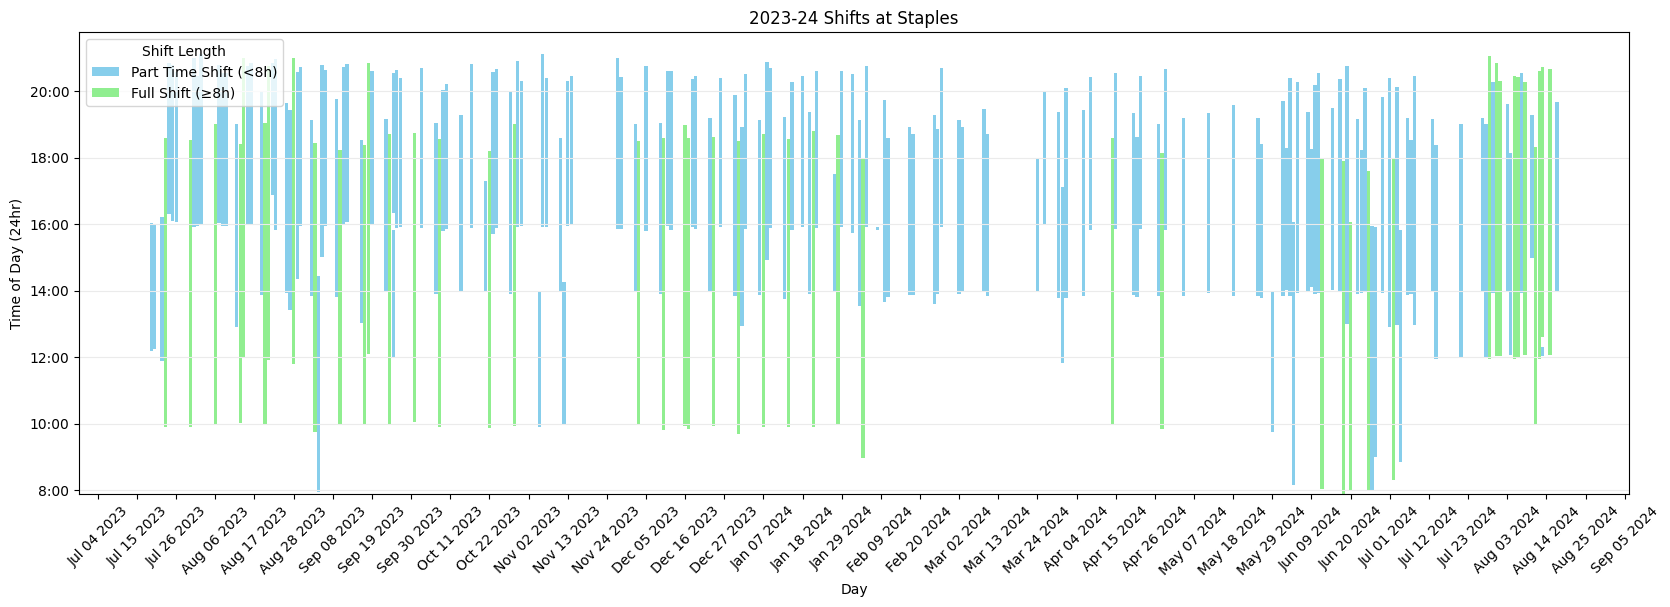

In [8]:
fig, ax = plt.subplots(figsize=(20, 6))

# plot 
for _, row in df.iterrows():

    if row['DATE'] == 'NaT':
        continue

    duration = (row['OUT'].hour + row['OUT'].minute / 60) - (row['IN'].hour + row['IN'].minute / 60)
    color = 'skyblue'
    if duration >= 8:
        color='lightgreen'
    
    ax.bar(x=row['DATE'],
            height=duration,
            bottom=row['IN'].hour + row['IN'].minute / 60,
            width=0.93,
            label='shift',
            color=color)

# title 
if currentYear == '2025':
    ax.set_title("2025 Summer Break Shifts at Staples")
else: 
    ax.set_title("2023-24 Shifts at Staples")


# format y axis
ax.set_ylabel("Time of Day (24hr)")
ax.set_yticks(range(8, 22, 2))
ax.set_yticklabels([f"{h}:00" for h in range(8, 22, 2)])
ax.yaxis.grid(True, which='major', color="#EBEBEB")


# format x axis 
ax.set_xlabel("Day")
ax.tick_params(axis='x', rotation=45)
if currentYear == '2025':
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
else: 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=round(len(df) / 18)))


# custom legend entries
legend_elements = [
    Patch(facecolor='skyblue', label='Part Time Shift (<8h)'),
    Patch(facecolor='lightgreen', label='Full Shift (≥8h)')
]
ax.legend(handles=legend_elements, loc='upper left', title='Shift Length')

plt.show()